## Lade Daten

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cases_df = pd.read_csv("../data/cases-rki-by-state.csv", sep=",")
cases_df['date'] = pd.to_datetime(cases_df['date'])

cases_df = cases_df.set_index("date")

#cases_df.loc["2021-05-22"]
cases_df

,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH
date,,,,,,,,,,,,,,,,
2020-03-02,2,0,30,34,2,9,2,0,4,116,2,4,3,1,0,0
2020-03-03,2,6,54,40,4,13,5,2,10,145,3,5,3,1,0,1
2020-03-04,2,9,92,50,4,15,6,4,14,235,7,5,3,1,0,1
2020-03-05,4,19,128,69,4,21,11,5,20,332,8,6,3,1,0,1
2020-03-06,4,24,179,120,4,22,14,5,27,394,10,8,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08,773016,1014832,3557293,4735244,191164,1771439,560740,473719,2237997,5069239,1104520,684105,306183,1484306,701594,698710
2022-05-09,774994,1018515,3567520,4747984,191924,1780592,562106,474935,2248910,5084450,1109947,689235,307024,1486918,703180,699937
2022-05-10,777274,1021663,3579284,4764688,193016,1788444,564332,476646,2262819,5101921,1114349,694195,308048,1489480,704985,700864


## Berechne Fallzahlen in Deutschland auf Basis der Bundesländer

In [4]:
cases_df["DE"] = 0
bundeslaender = cases_df.columns
for bl in bundeslaender:
    if not bl == "DE":
        cases_df["DE"] = cases_df["DE"] + cases_df[bl]

cases_df

,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH,DE
date,,,,,,,,,,,,,,,,,
2020-03-02,2,0,30,34,2,9,2,0,4,116,2,4,3,1,0,0,209
2020-03-03,2,6,54,40,4,13,5,2,10,145,3,5,3,1,0,1,294
2020-03-04,2,9,92,50,4,15,6,4,14,235,7,5,3,1,0,1,448
2020-03-05,4,19,128,69,4,21,11,5,20,332,8,6,3,1,0,1,632
2020-03-06,4,24,179,120,4,22,14,5,27,394,10,8,3,3,0,1,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08,773016,1014832,3557293,4735244,191164,1771439,560740,473719,2237997,5069239,1104520,684105,306183,1484306,701594,698710,25364101
2022-05-09,774994,1018515,3567520,4747984,191924,1780592,562106,474935,2248910,5084450,1109947,689235,307024,1486918,703180,699937,25448171
2022-05-10,777274,1021663,3579284,4764688,193016,1788444,564332,476646,2262819,5101921,1114349,694195,308048,1489480,704985,700864,25542008


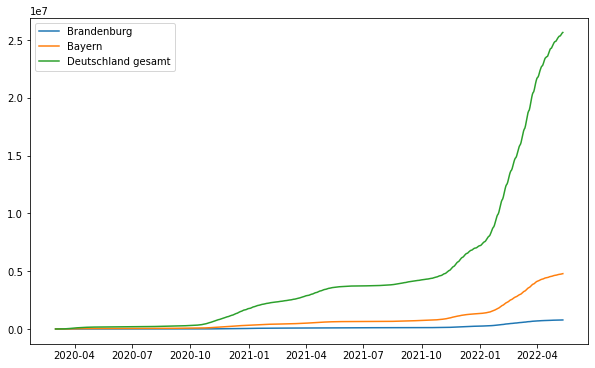

In [7]:
## Plotten
plt.figure(figsize=(10,6))
plt.plot(cases_df.index, cases_df["DE-BB"], label="Brandenburg")
plt.plot(cases_df.index, cases_df["DE-BY"], label="Bayern")
plt.plot(cases_df.index, cases_df["DE"], label="Deutschland gesamt")
plt.legend()
plt.show()

## Berechne tägliche Neuansteckungen

<AxesSubplot:xlabel='date'>

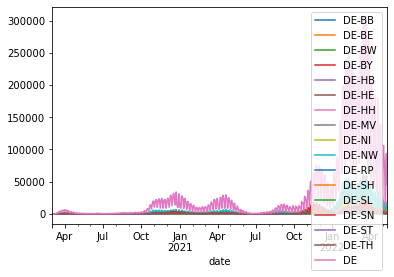

In [21]:
# Kopiere Dataframe
neuansteckungen_df = cases_df.copy()
# Berechne zeilenweise Differenz
neuansteckungen_df = neuansteckungen_df.diff().fillna(-1)
    
neuansteckungen_df.plot()
#plt.plot(neuansteckungen_df.index, neuansteckungen_df["DE"])
#plt.plot(neuansteckungen_df.index, neuansteckungen_df["DE"])
#plt.show()

## Berechne Inzidenzen

In [30]:
inzidenzen_df = neuansteckungen_df.copy()
einwohner_df = pd.read_csv("../data/population.csv", index_col=0)

bundeslaender = cases_df.columns

for bl in bundeslaender:
    if not bl == "DE":
        inzidenzen_df[bl] = inzidenzen_df[bl] / einwohner_df.loc[bl, "Einwohnerzahl"] * 100000


inzidenzen_df["DE"] = neuansteckungen_df["DE"] / einwohner_df["Einwohnerzahl"].sum() * 100000
inzidenzen_df

,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH,DE
date,,,,,,,,,,,,,,,,,
2020-03-02,-0.039810,-0.027436,-0.009034,-0.007647,-0.146416,-0.015960,-0.054313,-0.062124,-0.012527,-0.005576,-0.024481,-0.034522,-0.100958,-0.024522,-0.045283,-0.046660,-0.001205
2020-03-03,0.000000,0.164617,0.216811,0.045883,0.292832,0.063839,0.162939,0.124249,0.075165,0.161716,0.024481,0.034522,0.000000,0.000000,0.000000,0.046660,0.102386
2020-03-04,0.000000,0.082308,0.343285,0.076472,0.000000,0.031919,0.054313,0.124249,0.050110,0.501878,0.097923,0.000000,0.000000,0.000000,0.000000,0.000000,0.185499
2020-03-05,0.079620,0.274362,0.325217,0.145296,0.000000,0.095758,0.271565,0.062124,0.075165,0.540913,0.024481,0.034522,0.000000,0.000000,0.000000,0.000000,0.221635
2020-03-06,0.000000,0.137181,0.460724,0.390006,0.000000,0.015960,0.162939,0.000000,0.087692,0.345738,0.048961,0.069044,0.000000,0.049044,0.000000,0.000000,0.224045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08,1.472979,3.264902,13.613944,25.235684,5.856635,17.491756,43.884924,3.603212,16.861995,18.870606,3.427303,16.156249,2.624913,7.356661,9.418921,2.099718,15.516890
2022-05-09,78.744640,101.047348,92.388721,97.425035,111.276073,146.078503,74.191591,75.543200,136.712447,84.822930,132.856971,177.097343,84.905841,64.051995,71.819269,57.252309,101.265715
2022-05-10,90.767330,86.369006,106.273679,127.738445,159.886147,125.315023,120.900792,106.294749,174.244793,97.425640,107.764213,171.228621,103.381191,62.825885,81.736306,43.254190,113.030462


## Berechne 7 Tage Inzidenzen

In [32]:
neuansteckungen_7_df = cases_df.copy()

neuansteckungen_7_df = neuansteckungen_7_df.diff(periods=7)

neuansteckungen_7_df

,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH,DE
date,,,,,,,,,,,,,,,,,
2020-03-02,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2020-03-03,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2020-03-04,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2020-03-05,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2020-03-06,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08,9781.0,13115.0,57839.0,84819.0,4461.0,39192.0,11245.0,5733.0,64625.0,93724.0,23244.0,24310.0,5336.0,15727.0,9401.0,5762.0,468314.0
2022-05-09,9649.0,14373.0,57253.0,83782.0,4577.0,40379.0,11205.0,6029.0,63740.0,92847.0,24020.0,23688.0,5281.0,14643.0,9177.0,5547.0,466190.0
2022-05-10,9098.0,13249.0,56784.0,82400.0,4376.0,39700.0,11084.0,5845.0,62155.0,90094.0,23596.0,23007.0,5011.0,13321.0,8747.0,5163.0,453630.0


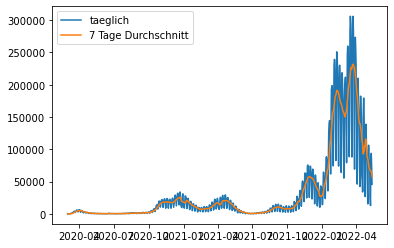

In [33]:
# Vergleiche tägliche Neuansteckungen und 7 Tage Durchschnitt
plt.plot(neuansteckungen_df.index, neuansteckungen_df["DE"], label="taeglich")
plt.plot(neuansteckungen_7_df.index, neuansteckungen_7_df["DE"] / 7.0, label="7 Tage Durchschnitt")
plt.legend()
plt.show()